# Direct Mail Prospect Scoring

## Set-up:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LogisticRegression

## Question 1:

First, let's load our estimation sample data to estimate the logistic regression coefficients.

In [2]:
estimation_data = pd.read_csv('prospectscoringhw.csv', header=2, nrows=200)
estimation_data

,Gender,foodwebsites,travelwebsites,restaurantexp,travelexp,entertainmentexp,incm,ethnicdivneigh,y
0,1,302,57,70,63,0,0,0,1
1,0,221,57,60,37,12,26,14,0
2,0,202,48,25,63,0,13,14,0
3,1,148,57,55,63,0,0,0,0
4,0,43,57,55,63,0,0,0,0
...,...,...,...,...,...,...,...,...,...
195,1,252,48,70,52,0,13,14,1
196,0,326,24,60,63,12,26,0,0
197,0,79,57,70,63,0,0,0,1
198,1,227,57,55,63,12,0,0,0


Using our estimation data, let's run a logistic regression predicting "y" as a function of our predictor variables.

In [3]:
# Split estimation data into X and y variables
X_train = estimation_data.iloc[0:200,:8]
y_train = estimation_data.iloc[0:200,8]

# Run logistic regression on the data
log_reg = LogisticRegression(max_iter=1000,penalty='none')
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none')

After running our logistic regression, let's get our estimates for the intercept and predictor variables.

In [4]:
print('Intercept:',log_reg.intercept_)
print('Coefficients:', log_reg.coef_)

Intercept: [-10.36474521]
Coefficients: [[-0.04700169  0.00596707  0.0438482   0.06982006  0.03414103  0.00889298
  -0.00089874 -0.00084813]]


Below is our score equation from the logistic regression.

$t = -10.36 + (-0.047)x_1 + 0.006x_2 + 0.044x_3 + 0.07x_4 + 0.034x_5 + 0.009x_6 + (-0.0009)x_7 + (-0.00085)x_8$

## Question 2:

First, let's load our holdout sample data.

In [5]:
holdout_data = pd.read_csv('prospectscoringhw.csv', header=206, nrows=300)
holdout_data

,Gender,foodwebsites,travelwebsites,restaurantexp,travelexp,entertainmentexp,incm,ethnicdivneigh,y
0,0,158,57,70,63,0,13,0,1
1,1,187,57,70,63,0,0,29,0
2,1,313,57,45,63,0,0,0,0
3,1,310,57,70,63,0,0,14,1
4,0,37,48,70,63,0,0,0,1
...,...,...,...,...,...,...,...,...,...
295,1,141,57,55,63,0,13,0,0
296,0,232,48,50,26,0,26,14,0
297,0,302,57,70,63,0,0,14,1
298,0,84,42,70,63,0,0,0,0


Using our score equation, let's calculate for each person in the holdout list of 300 people.

In [6]:
t_scores = []

for i in range(300):
    score = -10.36474521 + -0.04700169*holdout_data.iloc[i][0] + 0.00596707*holdout_data.iloc[i][1] + 0.0438482*holdout_data.iloc[i][2] + 0.06982006*holdout_data.iloc[i][3] + 0.03414103*holdout_data.iloc[i][4] + 0.00889298*holdout_data.iloc[i][5] + -0.00089874*holdout_data.iloc[i][6] + -0.00084813*holdout_data.iloc[i][7]
    t_scores.append(score)

holdout_data['score'] = t_scores
holdout_data.head()

,Gender,foodwebsites,travelwebsites,restaurantexp,travelexp,entertainmentexp,incm,ethnicdivneigh,y,score
0,0,158,57,70,63,0,13,0,1,0.104005
1,1,187,57,70,63,0,0,29,0,0.217136
2,1,313,57,45,63,0,0,0,0,-0.751919
3,1,310,57,70,63,0,0,14,1,0.963807
4,0,37,48,70,63,0,0,0,1,-1.000961


Using the scores we calculated, let's now compute the predicted response probability as well as the consequent lift.

In [7]:
# Calculating predicted response probabilities
response_prob = []

for i in range(300):
    r = math.exp(holdout_data.iloc[i][9]) / (1 + math.exp(holdout_data.iloc[i][9]))
    response_prob.append(r)

holdout_data['r'] = response_prob

# Calculating predicted lift
avg_response_rate = y_train.mean()
pred_lift = []
for i in range(300):
    lift = response_prob[i] / avg_response_rate
    pred_lift.append(lift)
    
holdout_data['lift'] = pred_lift
holdout_data.head()

,Gender,foodwebsites,travelwebsites,restaurantexp,travelexp,entertainmentexp,incm,ethnicdivneigh,y,score,r,lift
0,0,158,57,70,63,0,13,0,1,0.104005,0.525978,1.461049
1,1,187,57,70,63,0,0,29,0,0.217136,0.554072,1.539088
2,1,313,57,45,63,0,0,0,0,-0.751919,0.320403,0.890009
3,1,310,57,70,63,0,0,14,1,0.963807,0.723883,2.010787
4,0,37,48,70,63,0,0,0,1,-1.000961,0.268753,0.746535


## Question 3:

Now, let's sort all 300 persons in the holdoutsample in decreasing order of lift.

In [8]:
sorted_holdout = holdout_data.sort_values(by=['lift'], ascending=False)
sorted_holdout

,Gender,foodwebsites,travelwebsites,restaurantexp,travelexp,entertainmentexp,incm,ethnicdivneigh,y,score,r,lift
131,1,317,57,70,63,12,26,0,1,1.100799,0.750410,2.084472
243,0,321,57,70,63,0,28,0,0,1.063156,0.743293,2.064703
191,0,315,57,70,63,0,0,14,1,1.040645,0.738974,2.052707
159,0,311,57,70,63,0,0,0,1,1.028650,0.736654,2.046261
19,1,314,57,70,63,0,0,0,1,0.999550,0.730970,2.030472
...,...,...,...,...,...,...,...,...,...,...,...,...
211,0,406,39,0,63,0,26,0,0,-4.104517,0.016230,0.045084
152,0,291,39,10,52,0,0,28,0,-4.468462,0.011335,0.031486
96,0,159,57,15,41,0,26,0,0,-4.492918,0.011064,0.030734
285,1,354,30,10,52,0,0,0,0,-4.510424,0.010874,0.030206


## Question 4:

Let's plot the curve for marginal response rate against the number of solicitations made.

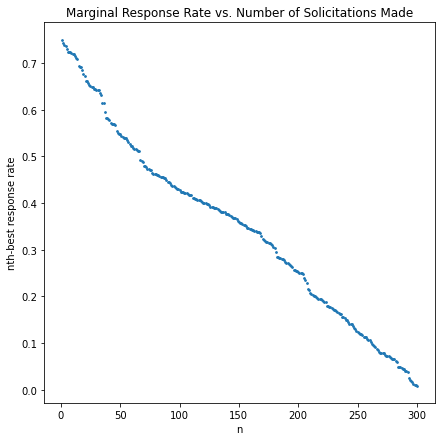

In [9]:
rank = list(range(1,301))
n_response_rate = holdout_data['r'].to_list()
n_response_rate.sort(reverse=True)
  
plt.figure(figsize=(7, 7))
plt.scatter(rank, n_response_rate, s=3)
plt.title('Marginal Response Rate vs. Number of Solicitations Made')
plt.xlabel('n')
plt.ylabel('nth-best response rate')
plt.show()

## Question 5:

Using the marginal cost rule, let's calculate how many of the best prospects in the holdout list Melrose should contact.

In [10]:
solicitation_cost = 12
LT_equity = 30
MC_number = solicitation_cost / LT_equity

print('Firm should solicit as long as nth highest predicted response rate is greater than ' + str(MC_number) + '.')
n_mc_rule = [r for r in n_response_rate if r > MC_number]
print('In our holdout data, this corresponds to n = ' + str(len(n_mc_rule)) + '.')

Firm should solicit as long as nth highest predicted response rate is greater than 0.4.
In our holdout data, this corresponds to n = 121.


## Question 6:

Let's compute the cumulative sum of the predicted response probabilities at rank n=300. Using the cumulative sum, let's plot the curve of the expected number of positive responses versus the number of solicitations made.

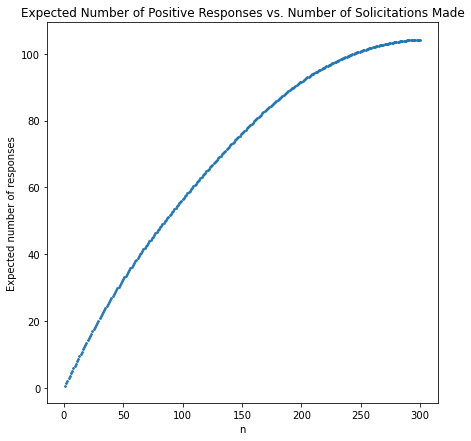

In [11]:
# Get cumulative sum
cumulative_sum = np.cumsum(n_response_rate)

# Plot the curve below 
plt.figure(figsize=(7, 7))
plt.scatter(rank, cumulative_sum, s=3)
plt.title('Expected Number of Positive Responses vs. Number of Solicitations Made')
plt.xlabel('n')
plt.ylabel('Expected number of responses')
plt.show()

As we can see from the chart above, the usual 80/20 rule does not hold likely due to the limit that we set our marginal response probability at when considering the marginal cost rule. For example, our marginal cost rule led us to consider the top n = 121 prospects to contact. However, if we are to adjust our estimations for the LT Customer equity or the solicitation costs, we could likely identify a different cutoff for our marginal response probability and in turn move closer to the usual 80/20 Pareto rule.

## Question 7:

Assuming that the firm has only 40 boxes of the pralines, let's use the limited supply rule to calculate how many prospects to contact.

In [18]:
limited_supply = [r for r in cumulative_sum if r < 40]
print('Using the limited supply rule, we should send solicitations to ' + str(len(limited_supply)) + ' prospects.')

Using the limited supply rule, we should send solicitations to 64 prospects.


## Question 8:

Let's compute the cumulative sum for the y variable in the holdout list.

In [37]:
y_holdout = holdout_data.iloc[0:300,8]
running_sum = np.cumsum(y_holdout)

Next, let's plot the cumulative sum for the y variable against the number of solicitations made.

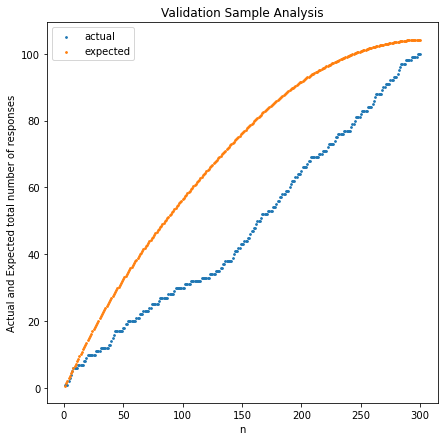

In [45]:
# Plot the curve below 
plt.figure(figsize=(7, 7))
plt.scatter(rank, running_sum, s=3, label='actual')
plt.scatter(rank, cumulative_sum, s=3, label='expected')
plt.title('Validation Sample Analysis')
plt.xlabel('n')
plt.ylabel('Actual and Expected total number of responses')
plt.legend()
plt.show()

Based on the chart above, it looks like our expected responses rose much more rapidly in the beginning compared to our actual responses. On the other hand, it also looks like our actual responses rose more rapidly in the end when compared to our expected responses. In addition, it looks like out of our n = 300 total solicitations, our actual number of responses was slightly lower than the expected number of responses. Regarding the decision made in step 7, the discrepancies here would indicate that we should perhaps increase our estimate for the number of prospects we should reach out to considering that the actual responses is underestimated at nearly all levels of solicitations made.